In [0]:
import PIL

import random
import os

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Existing datasets With that in mind, let's try to find a dataset that we can work with. There are a ton of datasets out there that current machine learning researchers use. For instance if I do a quick Google search for Deep Learning Datasets, i can see for instance a link on deeplearning.net, listing a few interesting ones e.g. http://deeplearning.net/datasets/, including MNIST, CalTech, CelebNet, LFW, CIFAR, MS Coco, Illustration2Vec, and there are ton more. 

## Preprocessing Data
In this section, we're going to learn a bit about working with an image based dataset. We'll see how image dimensions are formatted as a single image and how they're represented as a collection using a 4-d array. We'll then look at how we can perform dataset normalization. 


In [0]:
## Load celeba
import urllib

def get_celeb_files():
    """Downloads the first 100 images of the celeb dataset.
    Files will be placed in a directory 'img_align_celeba' if one
    doesn't exist.
    Returns
    -------
    files : list of strings
        Locations to the first 100 images of the celeb net dataset.
    """
    # Create a directory
    if not os.path.exists('img_align_celeba'):
        os.mkdir('img_align_celeba')

    # Now perform the following 100 times:
    for img_i in range(1, 101):

        # create a string using the current loop counter
        f = '000%03d.jpg' % img_i

        if os.path.exists('img_align_celeba/'+f):
            continue

        # and get the url with that string appended the end
        url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f

        # We'll print this out to the console so we can see how far we've gone
        print(url, end='\r')

        # And now download the url to a location inside our new directory
        urllib.request.urlretrieve(url, os.path.join('img_align_celeba', f))

    files = [os.path.join('img_align_celeba', file_i)
             for file_i in os.listdir('img_align_celeba')
             if '.jpg' in file_i]
    return files

I'll be using a popular image dataset for faces called the CelebFaces dataset. I've provided some helper functions which you can find on the resources page, which will just help us with manipulating images and loading this dataset.

In [4]:
files = get_celeb_files()

Let's get the 65th image in this list of files, and then read the file at that location as an image, setting the result to a variable, img, and inspect a bit further what's going on:

### Understanding Image Shapes

In [6]:
img = plt.imread(files[65])
print(img.shape)

(218, 178, 3)


This means that the image has 218 rows, 178 columns, and 3 color channels corresponding to the Red, Green, and Blue channels of the image, or RGB. Let's try looking at just one of the color channels.

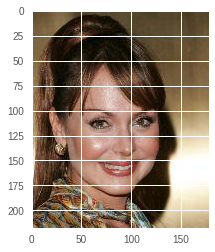

In [7]:
plt.imshow(img)

We use the special colon operator to say take every value in this dimension. This is saying, give me every row, every column, and the 0th dimension of the color channels. What we're seeing is the amount of Red, Green, or Blue contributing to the overall color image.

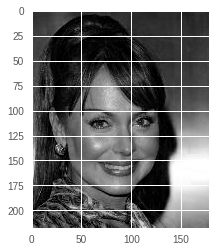

In [8]:
plt.imshow(img[:, :, 0], cmap='gray')
plt.imshow(img[:, :, 1], cmap='gray')
plt.imshow(img[:, :, 2], cmap='gray')

We use the special colon operator to say take every value in this dimension. This is saying, give me every row, every column, and the 0th dimension of the color channels. What we're seeing is the amount of Red, Green, or Blue contributing to the overall color image.

In [0]:
#Lets load a bunch of images
imgs = [plt.imread(f_i) for f_i in files]

Remember that an image has a shape describing the height, width, channels:

In [10]:
imgs[0].shape

(218, 178, 3)

It turns out we'll often use another convention for storing many images in an array using a new dimension called the batch dimension. The resulting image shape will be exactly the same, except we'll stick on a new dimension on the beginning... giving us number of images x the height x the width x the number of color channels.

N x H x W x C

A Color image should have 3 color channels, RGB.

We can combine all of our images to have these 4 dimensions by telling numpy to give us an array of all the images.

In [11]:
data = np.array(imgs)
data.shape

(100, 218, 178, 3)

This will only work if every image in our list is exactly the same size. So if you have a wide image, short image, long image, forget about it. You'll need them all to be the same size. If you are unsure of how to get all of your images you will have to develop de code to check this.

## Mean/Deviation of Images

Now that we have our data in a single numpy variable, we can do a lot of cool stuff. Let's look at the mean of the batch channel:

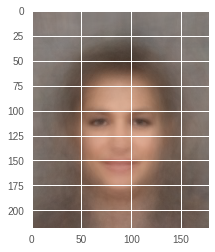

In [12]:
mean_img = np.mean(data, axis=0)
plt.imshow(mean_img.astype(np.uint8))

This is the first step towards building our robot overlords. We've reduced down our entire dataset to a single representation which describes what most of our dataset looks like. There is one other very useful statistic which we can look at very easily:

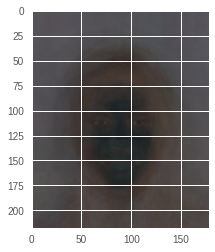

In [13]:
std_img = np.std(data, axis=0)
plt.imshow(std_img.astype(np.uint8))

We've just shown where changes are likely to be in our dataset of images. Or put another way, we're showing where and how much variance there is in our previous mean image representation.

We're looking at this per color channel. So we'll see variance for each color channel represented separately, and then combined as a color image. We can try to look at the average variance over all color channels by taking their mean:

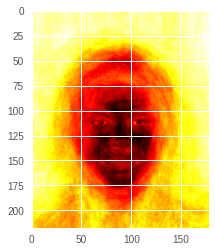

In [14]:
plt.imshow(np.mean(std_img, axis=2).astype(np.uint8), cmap='hot')

This is showing us on average, how every color channel will vary as a heatmap. The more red, the more likely that our mean image is not the best representation. The more blue, the less likely that our mean image is far off from any other possible image.

## Histograms

Let's have a look at our dataset another way to see why this might be a useful thing to do. We're first going to convert our batch x height x width x channels array into a 1 dimensional array. Instead of having 4 dimensions, we'll now just have 1 dimension of every pixel value stretched out in a long vector, or 1 dimensional array.

In [15]:
flattened  = data.ravel()
print(data[:1])

[[[[127 116 114]
   [127 116 114]
   [127 116 114]
   ...
   [201 196 203]
   [201 196 203]
   [201 196 203]]

  [[127 116 114]
   [127 116 114]
   [127 116 114]
   ...
   [201 196 203]
   [201 196 203]
   [201 196 203]]

  [[127 116 114]
   [127 116 114]
   [127 116 114]
   ...
   [201 196 203]
   [201 196 203]
   [201 196 203]]

  ...

  [[159 148 152]
   [159 148 152]
   [159 148 152]
   ...
   [198 194 208]
   [197 193 207]
   [197 193 207]]

  [[158 149 152]
   [158 149 152]
   [158 149 152]
   ...
   [201 197 211]
   [200 196 210]
   [200 196 210]]

  [[158 149 152]
   [158 149 152]
   [158 149 152]
   ...
   [201 197 211]
   [200 196 210]
   [200 196 210]]]]


In [16]:
print(flattened[:10])

[127 116 114 127 116 114 127 116 114 127]


We first convert our N x H x W x C dimensional array into a 1 dimensional array. The values of this array will be based on the last dimensions order. So we'll have: [, , , , , , , , , ...]

We can visualize what the "distribution", or range and frequency of possible values are. This is a very useful thing to know. It tells us whether our data is predictable or not.

(array([216804., 117821.,  99125.,  71049.,  66478.,  62066.,  62528.,
         58085.,  56686.,  56114.,  56848.,  58551.,  63168.,  61086.,
         59193.,  59305.,  62526.,  63596.,  62285.,  65061.,  63389.,
         61989.,  61411.,  60742.,  60464.,  60307.,  59074.,  59312.,
         60353.,  64807.,  67305.,  61667.,  59906.,  60546.,  62017.,
         62268.,  63030.,  62799.,  62396.,  62609.,  59541.,  58918.,
         57822.,  61451.,  63481.,  57782.,  57212.,  56516.,  56039.,
         58385.,  56252.,  55089.,  54677.,  52066.,  51012.,  48826.,
         47602.,  46064.,  45351.,  43735.,  42849.,  42903.,  42571.,
         41789.,  42412.,  42705.,  42982.,  43107.,  43372.,  43416.,
         43323.,  42808.,  42253.,  42302.,  42008.,  41846.,  42800.,
         42476.,  42435.,  42405.,  42584.,  42612.,  42671.,  42344.,
         42610.,  42023.,  42214.,  41700.,  41302.,  41160.,  41885.,
         42650.,  41703.,  42498.,  41983.,  42702.,  42735.,  43540.,
      

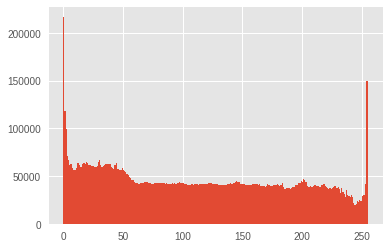

In [17]:
plt.hist(flattened.ravel(), 255)

The last line is saying give me a histogram of every value in the vector, and use 255 bins. Each bin is grouping a range of values. The bars of each bin describe the frequency, or how many times anything within that range of values appears.In other words, it is telling us if there is something that seems to happen more than anything else. If there is, it is likely that a neural network will take advantage of that.

## Histogram Equalization
The mean of our dataset looks like this:

(array([   2.,    0.,    0.,    0.,    2.,   18.,   30.,   23.,   42.,
          42.,   43.,   41.,   51.,   48.,   30.,   52.,   58.,   59.,
          67.,   67.,   71.,   83.,   94.,  110.,  110.,  107.,  134.,
         103.,  109.,  160.,  198.,  206.,  211.,  265.,  306.,  289.,
         344.,  335.,  361.,  382.,  402.,  390.,  400.,  497.,  544.,
         594.,  663.,  679.,  749.,  803.,  847.,  882.,  886.,  938.,
         817.,  857.,  801.,  825.,  831.,  896.,  875.,  861.,  843.,
         870.,  842.,  897.,  863.,  861.,  906.,  939.,  905.,  935.,
         946.,  972., 1004., 1064., 1079., 1124., 1162., 1103., 1129.,
        1108., 1085., 1079., 1051., 1155., 1068., 1093., 1170., 1171.,
        1146., 1213., 1146., 1174., 1211., 1229., 1173., 1196., 1216.,
        1150., 1255., 1373., 1344., 1445., 1554., 1554., 1553., 1478.,
        1506., 1469., 1546., 1626., 1659., 1568., 1548., 1559., 1576.,
        1376., 1283., 1189., 1151., 1093., 1046., 1068., 1021., 1059.,
      

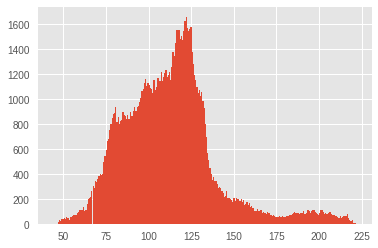

In [18]:
plt.hist(mean_img.ravel(), 255)

When we subtract an image by our mean image, we remove all of this information from it. And that means that the rest of the information is really what is important for describing what is unique about it.

Let's try and compare the histogram before and after "normalizing our data":

Text(0.5,1,'(img - mean) distribution')

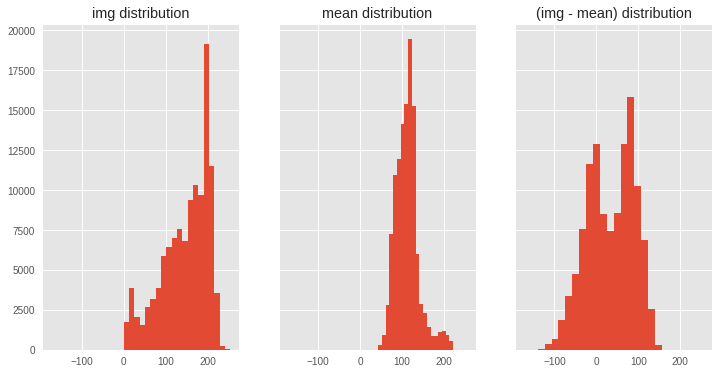

In [19]:
bins  =  20
fig,  axs  =  plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0]).ravel(), bins)
axs[0].set_title('img distribution')
axs[1].hist((mean_img).ravel(), bins)
axs[1].set_title('mean distribution')
axs[2].hist((data[0] - mean_img).ravel(), bins)
axs[2].set_title('(img - mean) distribution')

What we can see from the histograms is the original image's distribution of values from 0 - 255. The mean image's data distribution is mostly centered around the value 100. When we look at the difference of the original image and the mean image as a histogram, we can see that the distribution is now centered around 0. What we are seeing is the distribution of values that were above the mean image's intensity, and which were below it. Let's take it one step further and complete the normalization by dividing by the standard deviation of our dataset:

Text(0.5,1,'((img - mean) / std_dev) distribution')

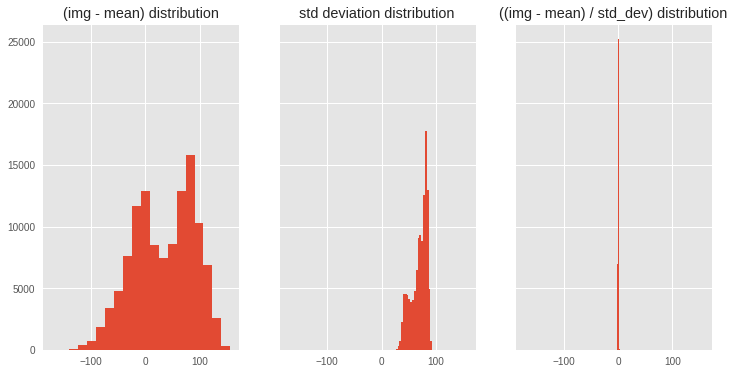

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0] - mean_img).ravel(), bins)
axs[0].set_title('(img - mean) distribution')
axs[1].hist((std_img).ravel(), bins)
axs[1].set_title('std deviation distribution')
axs[2].hist(((data[0] - mean_img) / std_img).ravel(), bins)
axs[2].set_title('((img - mean) / std_dev) distribution')

Now our data has been squished into a peak! We'll have to look at it on a different scale to see what's going on:

(-5, 5)

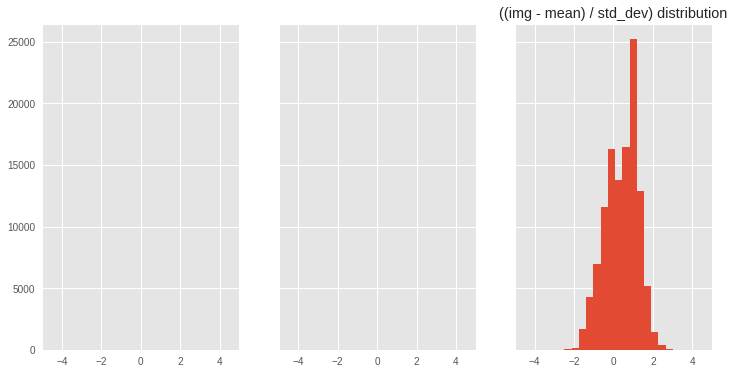

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
#axs[0].hist((data[0] - mean_img).ravel(), bins)
#axs[0].set_title('(img - mean) distribution')
#axs[1].hist((std_img).ravel(), bins)
#axs[1].set_title('std deviation distribution')
axs[2].hist(((data[0] - mean_img) / std_img).ravel(), bins)
axs[2].set_title('((img - mean) / std_dev) distribution')
axs[2].set_xlim([-150, 150])
axs[2].set_xlim([-100, 100])
axs[2].set_xlim([-50, 50])
axs[2].set_xlim([-10, 10])
axs[2].set_xlim([-5, 5])

What we can see is that the data is in the range of -3 to 3, with the bulk of the data centered around -1 to 1. This is the effect of normalizing our data: most of the data will be around 0, where some deviations of it will follow between -3 to 3.
If our data does not end up looking like this, then we should either (1): get much more data to calculate our mean/std deviation, or (2): either try another method of normalization, such as scaling the values between 0 to 1, or -1 to 1, or possibly not bother with normalization at all. There are other options that one could explore, including different types of normalization such as local contrast normalization for images or PCA based normalization but we won't have time to get into those in this course.

# OWN NEURAL NETWORK

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


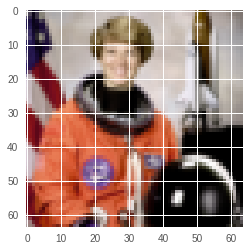

In [4]:
from skimage.data import astronaut
from scipy.misc import imresize
img = imresize(astronaut(), (64, 64))
plt.imshow(img)

In [5]:
# We'll first collect all the positions in the image in our list, xs
xs = []
# And the corresponding colors for each of these positions
ys = []

# Now loop over the image
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        # And store the inputs
        xs.append([row_i, col_i])
        # And outputs that the network needs to learn to predict
        ys.append(img[row_i, col_i])

# we'll convert our lists to arrays
xs = np.array(xs)
ys = np.array(ys)

# Normalizing the input by the mean and standard deviation
xs = (xs - np.mean(xs)) / np.std(xs)

# and print the shapes
xs.shape, ys.shape

((4096, 2), (4096, 3))

What we're going to do is use regression to predict the value of a pixel given its (row, col) position. So the input to our network is X = (row, col) value. And the output of the network is Y = (r, g, b).

We can get our original image back by reshaping the colors back into the original image shape:

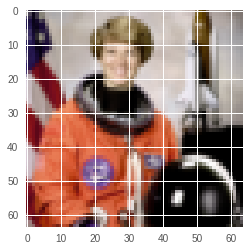

In [6]:
plt.imshow(ys.reshape(img.shape))

## Let'a create our model

In [7]:
from keras.layers import Dense, Flatten
from keras import models, optimizers

Using TensorFlow backend.


In [0]:
def Create_Model(neurons):
  
  model = models.Sequential()
    
  model.add(Dense(neurons[0], activation='relu', input_shape = (2,)))
    
  for layer in neurons[1:len(neurons)-1]:
    model.add(Dense(layer, activation='relu'))
        
  model.add(Dense(neurons[len(neurons)-1]))
    
  model.compile(optimizer=optimizers.Adam(lr=0.001), loss = 'mse', metrics=['mae'])
  return model      

In [0]:
model = Create_Model([2,64,64,64,64,64,64,3])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
__________

In [11]:
hist = model.fit(x=xs, y=ys, epochs=5)

Epoch 1/5
4096/4096 [==============================] - 2s 560us/step - loss: 10843.6630 - mean_absolute_error: 85.6554
Epoch 2/5
4096/4096 [==============================] - 1s 325us/step - loss: 4428.1579 - mean_absolute_error: 56.6744
Epoch 3/5
4096/4096 [==============================] - 1s 321us/step - loss: 4083.1660 - mean_absolute_error: 53.6605
Epoch 4/5
4096/4096 [==============================] - 1s 324us/step - loss: 4061.8943 - mean_absolute_error: 53.3088
Epoch 5/5
4096/4096 [==============================] - 1s 326us/step - loss: 4026.0414 - mean_absolute_error: 52.9965


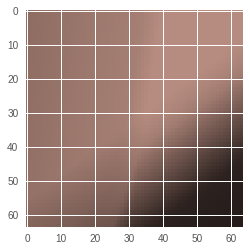

In [12]:
ys_pred = model.predict(x=xs)
plt.imshow(np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8))

In [13]:
hist = model.fit(x=xs, y=ys, epochs=25)

Epoch 1/25
4096/4096 [==============================] - 1s 318us/step - loss: 3946.0063 - mean_absolute_error: 52.4940
Epoch 2/25
4096/4096 [==============================] - 1s 320us/step - loss: 3902.9489 - mean_absolute_error: 51.8793
Epoch 3/25
4096/4096 [==============================] - 1s 317us/step - loss: 3855.8522 - mean_absolute_error: 51.5682
Epoch 4/25
4096/4096 [==============================] - 1s 321us/step - loss: 3743.8877 - mean_absolute_error: 50.6629
Epoch 5/25
4096/4096 [==============================] - 1s 320us/step - loss: 3741.1854 - mean_absolute_error: 50.5224
Epoch 6/25
4096/4096 [==============================] - 1s 319us/step - loss: 3662.6809 - mean_absolute_error: 49.8509
Epoch 7/25
4096/4096 [==============================] - 1s 326us/step - loss: 3681.7180 - mean_absolute_error: 49.9782
Epoch 8/25
4096/4096 [==============================] - 1s 323us/step - loss: 3639.7498 - mean_absolute_error: 49.5992
Epoch 9/25
4096/4096 [==========================

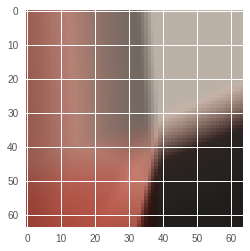

In [14]:
ys_pred = model.predict(x=xs)
plt.imshow(np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8))

In [15]:
hist = model.fit(x=xs, y=ys, epochs=100)

Epoch 1/100
4096/4096 [==============================] - 1s 334us/step - loss: 3298.4954 - mean_absolute_error: 45.9087
Epoch 2/100
4096/4096 [==============================] - 1s 332us/step - loss: 3320.8420 - mean_absolute_error: 46.0579
Epoch 3/100
4096/4096 [==============================] - 1s 326us/step - loss: 3324.1498 - mean_absolute_error: 46.2686
Epoch 4/100
4096/4096 [==============================] - 1s 323us/step - loss: 3296.1540 - mean_absolute_error: 45.9150
Epoch 5/100
4096/4096 [==============================] - 1s 341us/step - loss: 3260.2410 - mean_absolute_error: 45.6440
Epoch 6/100
4096/4096 [==============================] - 1s 328us/step - loss: 3252.9720 - mean_absolute_error: 45.6239
Epoch 7/100
4096/4096 [==============================] - 1s 324us/step - loss: 3261.6918 - mean_absolute_error: 45.6674
Epoch 8/100
4096/4096 [==============================] - 1s 328us/step - loss: 3243.7160 - mean_absolute_error: 45.4860
Epoch 9/100
4096/4096 [=================

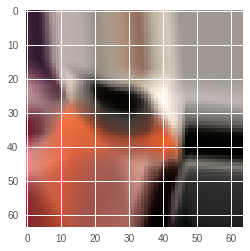

In [16]:
ys_pred = model.predict(x=xs)
plt.imshow(np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8))

In [17]:
hist = model.fit(x=xs, y=ys, epochs=500)

Epoch 1/500
4096/4096 [==============================] - 1s 326us/step - loss: 1850.7837 - mean_absolute_error: 31.1814
Epoch 2/500
4096/4096 [==============================] - 1s 328us/step - loss: 1854.8864 - mean_absolute_error: 31.1538
Epoch 3/500
4096/4096 [==============================] - 1s 328us/step - loss: 1859.6054 - mean_absolute_error: 31.2164
Epoch 4/500
4096/4096 [==============================] - 1s 325us/step - loss: 1839.3326 - mean_absolute_error: 31.0433
Epoch 5/500
4096/4096 [==============================] - 1s 323us/step - loss: 1862.4251 - mean_absolute_error: 31.4347
Epoch 6/500
4096/4096 [==============================] - 1s 332us/step - loss: 1860.2764 - mean_absolute_error: 31.2442
Epoch 7/500
4096/4096 [==============================] - 1s 330us/step - loss: 1836.4691 - mean_absolute_error: 30.8749
Epoch 8/500
4096/4096 [==============================] - 1s 325us/step - loss: 1862.1304 - mean_absolute_error: 31.4626
Epoch 9/500
4096/4096 [=================

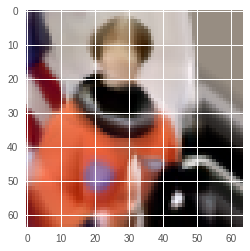

In [18]:
ys_pred = model.predict(x=xs)
plt.imshow(np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8))

In [0]:
loss = hist.history['loss']
mae = hist.history['mean_absolute_error']

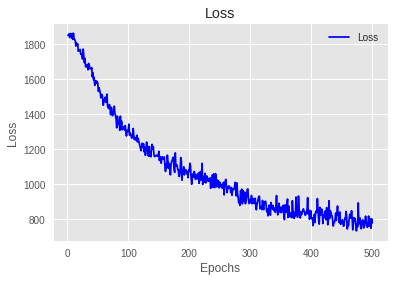

In [20]:
epochs = np.arange(1, len(mae)+1)

# "b" is for "blue"
plt.plot(epochs, loss, 'b', label='Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

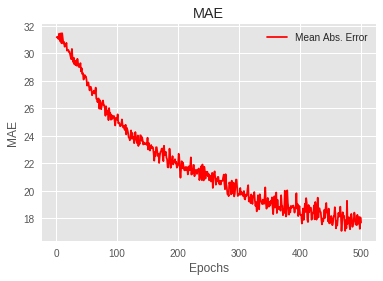

In [21]:
plt.plot(epochs, mae, 'r', label='Mean Abs. Error')
plt.title('MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

Credits: Parag K Mital. [texto del enlace](http://pkmital.com)